### **Anime Analytics**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

**Conexión a la base de datos**

In [2]:
try:
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='saito17Jr',
        database='anime'
    )

    if connection.is_connected():
        db_info = connection.server_info
        print(f'Conexión exitosa a MySQL versión {db_info}')

        cursor = connection.cursor()

        lista_secuencia = [
            ('Animes',"SELECT * FROM animes"),
            ('Generos','SELECT * FROM generos'),
            ('Estudio','SELECT * FROM estudios'),
            ('Popularidad','SELECT * FROM popularidad'),
            ('Anime_Generos','SELECT * FROM anime_generos'),
            ('Anime_Estudios','SELECT * FROM anime_estudios'),
        ]

        dic_df = {}

        for df_name, query in lista_secuencia:
            cursor.execute(query)
            data = cursor.fetchall()
            column_name = [i[0]for i in cursor.description]
            df = pd.DataFrame(data, columns=column_name)
            dic_df[df_name] = df
            print(f'DataFrame -> {df_name}:\n {df.head(3)}')
        

except mysql.connector.Error as e:
    print(f'Error al conectar a MySQL {e}')
finally:
    if connection is not None and connection.is_connected():
        connection.close()
        print(f'\nConexión cerrada')

Conexión exitosa a MySQL versión 8.0.44
DataFrame -> Animes:
    mal_id                           titulo   tipo  episodios  annio temporada  \
0       1                     Cowboy Bebop     TV         26   1998    spring   
1       5  Cowboy Bebop: Tengoku no Tobira  Movie          1      0       N/A   
2       6                           Trigun     TV         26   1998    spring   

                    clasificacion       duracion  \
0  R - 17+ (violence & profanity)  24 min per ep   
1  R - 17+ (violence & profanity)    1 hr 55 min   
2       PG-13 - Teens 13 or older  24 min per ep   

                                            sinopsis  anime_rank  
0  Crime is timeless. By the year 2071, humanity ...          48  
1  Another day, another bounty—such is the life o...         232  
2  Vash the Stampede is the man with a $$60,000,0...         386  
DataFrame -> Generos:
    genero_id nombre_genero
0          1        Action
1         50    Adult Cast
2          2     Adventure
DataF

#### **1.-Tendencias Centrales**

- **¿Cómo han evolucionado las calificaciones promedio desde el año 2000 hasta hoy?**

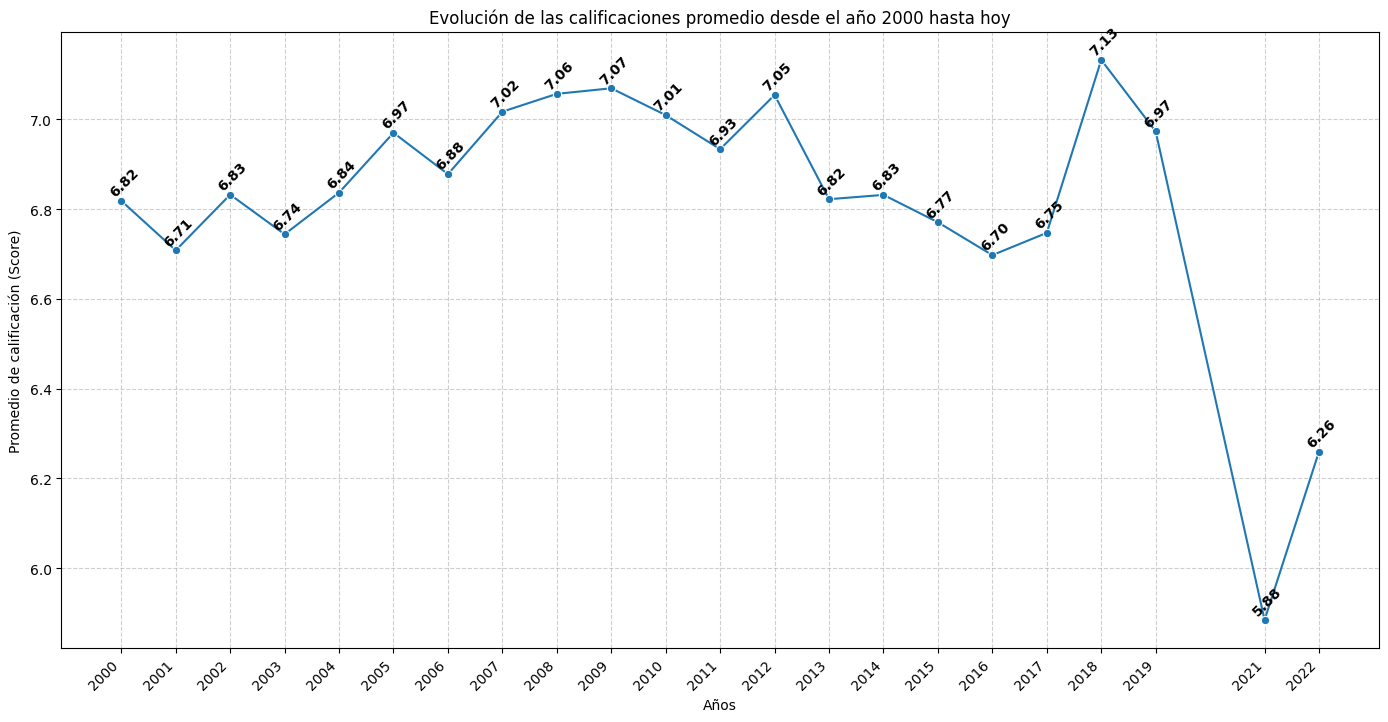

In [100]:
# Obtenciónde df uniendo animes y popularidad
join_animes_popularidad = pd.merge(dic_df['Animes'], dic_df['Popularidad'], on='mal_id', how='inner')
animes_popularidad_mayor_2000 = join_animes_popularidad[(join_animes_popularidad['annio'] >= 2000) & (join_animes_popularidad['score'] != 9999)]
promedio_por_annio = animes_popularidad_mayor_2000.groupby('annio')['score'].mean()
df_promedio_por_anio = promedio_por_annio.reset_index()

# Creación de gráfica
plt.figure(figsize=(17,8))
sns.lineplot(data=df_promedio_por_anio, x='annio', y='score', marker='o')

años_unicos = df_promedio_por_anio['annio'].unique()

plt.xticks(
    ticks=años_unicos, 
    labels=años_unicos,
    rotation=45,  
    ha='right'    
)

plt.title('Evolución de las calificaciones promedio desde el año 2000 hasta hoy')
plt.xlabel('Años')
plt.ylabel('Promedio de calificación (Score)')
plt.grid(True, linestyle='--', alpha=0.6)

for index, row in df_promedio_por_anio.iterrows():
    # Coordenadas X e Y donde se colocará el texto
    x_coord = row['annio']
    y_coord = row['score']
    
    # El valor a mostrar, redondeado a 2 decimales
    valor_texto = f"{y_coord:.2f}"
    
    # Posicionar el texto
    plt.text(
        x=x_coord + 0.05, 
        y=y_coord + 0.01,  # Ajuste (+0.01) para que el texto quede un poco encima del punto
        s=valor_texto, 
        ha='center',       
        fontsize=10,
        weight='bold',
        rotation=45   
    )

plt.show()

**Respuesta:**

La evolución de las calificaciones de los animes a sido de forma asendente y desendente (en formade picos), ya que en algunos años se mantiene arriba y en otros años deciende, anque el desenso es muy leve siempre manteniendose por encimos de 6.5 con excepción en los años más recientes que tiene un desenso más bajo llegando hasta 5.88, esto puede deberse a la falta de datos en las años más recientes.

* **¿Han aumentado o disminuido la oferta de anime por año y temporada?**

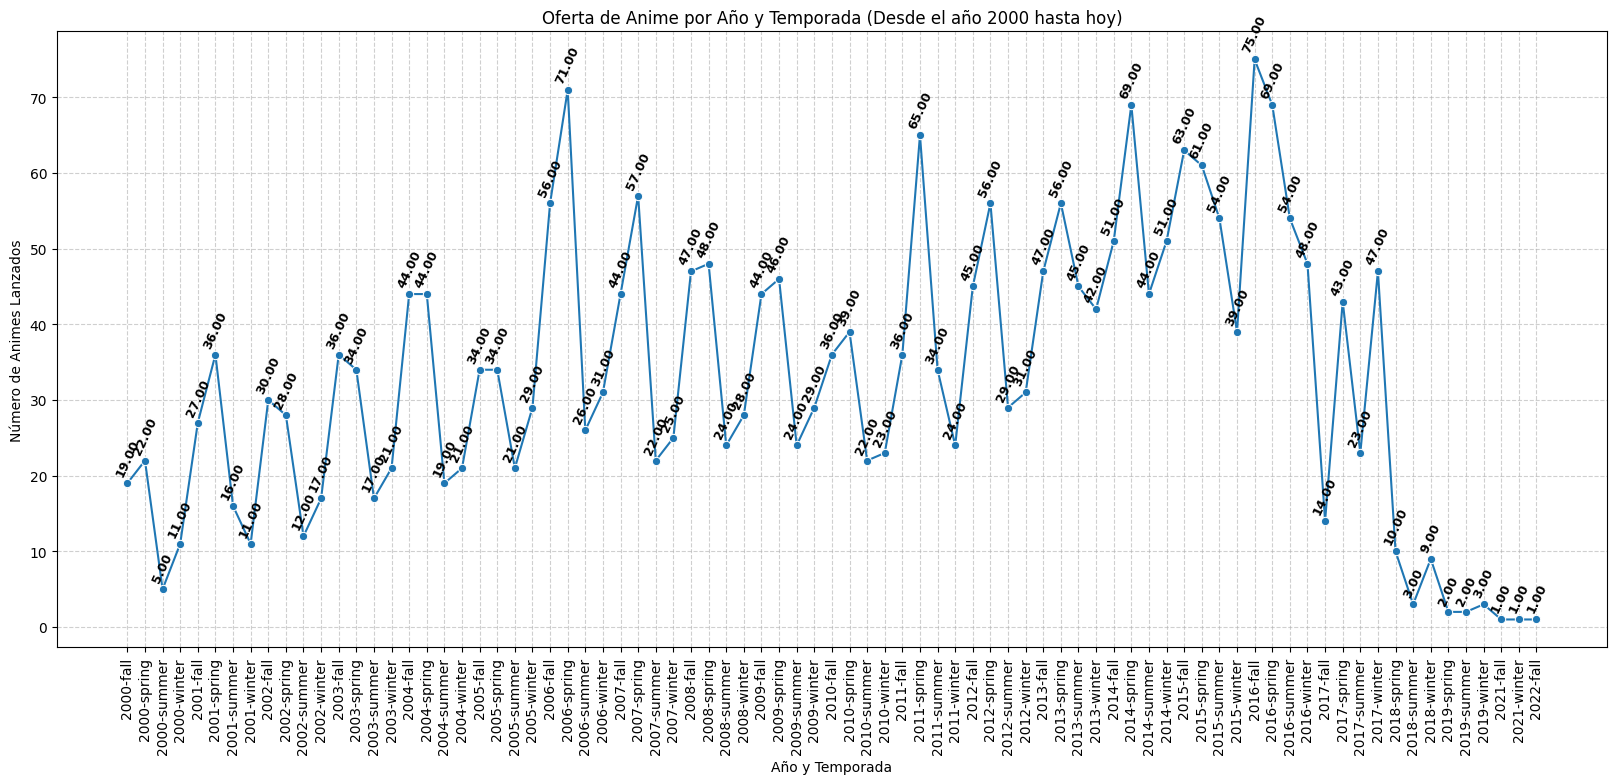

In [103]:
df_animes = dic_df['Animes']
df_animes = df_animes[(df_animes['annio'] >= 2000) & (df_animes['temporada'] != 'N/A')]
annio_temporada = df_animes.groupby(['annio','temporada'])['mal_id'].count()
df_oferta = annio_temporada.to_frame(name='oferta_count').reset_index()
# df_oferta = df_oferta[df_oferta['annio'] >= 2000]
# Crear una variable combinada para el eje X
df_oferta['annio_temporada'] = df_oferta['annio'].astype(str) + '-' + df_oferta['temporada']

# Gráfico para ver la tendencia 
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_oferta, x='annio_temporada', y='oferta_count', marker='o')

plt.xticks(rotation=90)
plt.title('Oferta de Anime por Año y Temporada (Desde el año 2000 hasta hoy)')
plt.ylabel('Número de Animes Lanzados')
plt.xlabel('Año y Temporada')
plt.grid(True, linestyle='--', alpha=0.6)

for index, row in df_oferta.iterrows():
    # Coordenadas X e Y donde se colocará el texto
    x_coord = row['annio_temporada']
    y_coord = row['oferta_count']
    
    # El valor a mostrar, redondeado a 2 decimales
    valor_texto = f"{y_coord:.2f}"
    
    # Posicionar el texto
    plt.text(
        x=x_coord, 
        y=y_coord + 1, 
        s=valor_texto, 
        ha='center',       
        fontsize=9,
        weight='bold',
        rotation=65   
    )

plt.show()

**Respuesta:**

* La oferta de anime aumentó significativamente desde el año 2000, con la mayoría de las temporadas alcanzando su pico alrededor de 2015-2016 (por ejemplo, spring 2016 con 69 animes lanzados).
* La oferta de anime disminuyó drásticamente a partir de 2017, cayendo a valores muy bajos (1.00 en muchas temporadas recientes), esta caída a partir de 2017 no es una disminución real de la producción de la industria; más bien, es una limitación de los datos que se lograron extraer de la API, lo cual ya se había identificado como una recomendación de mejora.

#### **2.-Calidad y popularidad**

* **¿Qué géneros tienen mejor desempeño en rating?**

In [104]:
df_animes = dic_df['Animes']
df_generos = dic_df['Generos']

df_animes = df_animes[df_animes['annio'] >= 2000]
df_generos = df_generos[df_generos['nombre_genero'] != 'Award Winning']

# Unir las tablas 
df_merge = pd.merge(df_animes, dic_df['Popularidad'].query('score != 9999'), on='mal_id', how='inner')
anime_populari_anime_generos = pd.merge(df_merge, dic_df['Anime_Generos'], on='mal_id', how='inner')
anime_populari_anime_generos_generos = pd.merge(anime_populari_anime_generos, df_generos, on='genero_id', how='inner')

# Agrupar los datos
genero_ranting = anime_populari_anime_generos_generos.groupby('nombre_genero')['score'].mean().reset_index()
genero_ranting['score'] = genero_ranting['score'].round(2)

genero_ranting = genero_ranting.sort_values(by='score', ascending=False)
genero_ranting

,nombre_genero,score
18,Suspense,7.37
12,Mystery,7.22
2,Avant Garde,7.21
5,Drama,7.19
16,Sports,7.17
17,Supernatural,7.12
15,Slice of Life,7.06
13,Romance,7.05
0,Action,6.99
1,Adventure,6.92


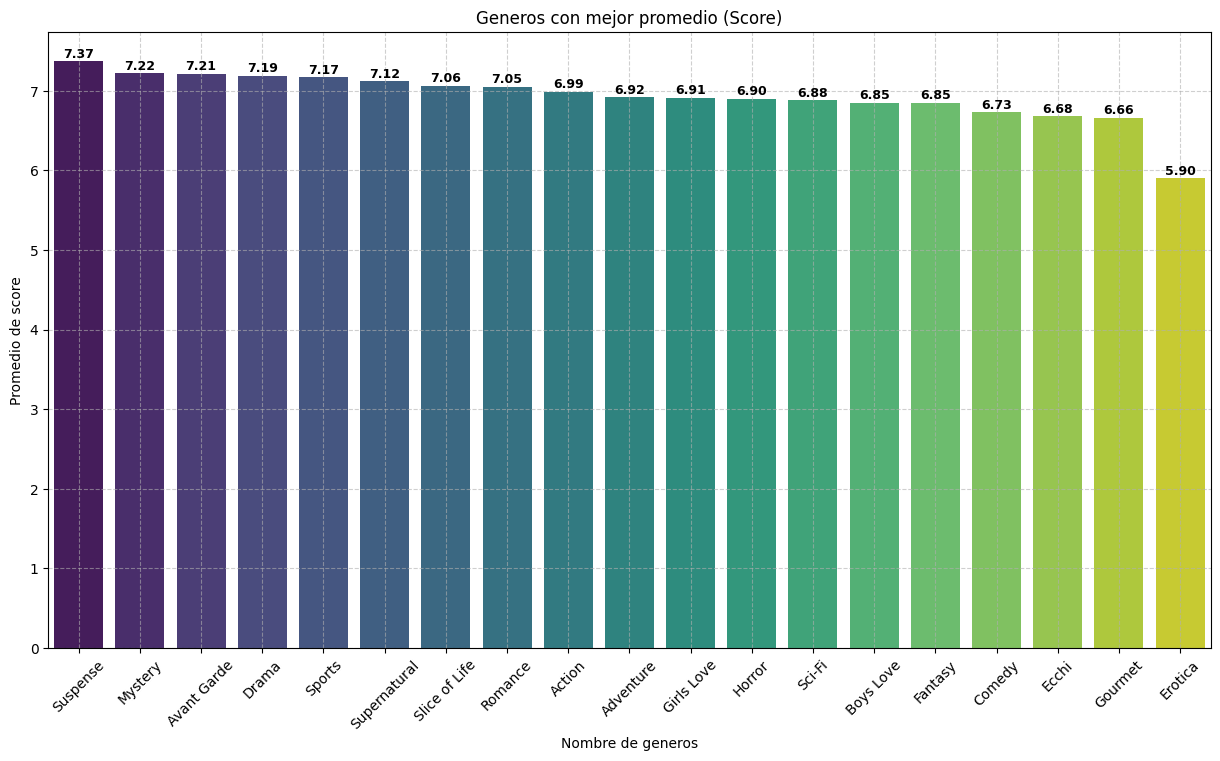

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(data=genero_ranting, x='nombre_genero', y='score', palette='viridis', hue='nombre_genero')
plt.xticks(rotation=45)
plt.title('Generos con mejor promedio (Score)')
plt.xlabel('Nombre de generos')
plt.ylabel('Promedio de score')
plt.grid(True, linestyle='--', alpha=0.6)

for index, row in genero_ranting.iterrows():
    # Coordenadas X e Y donde se colocará el texto
    x_coord = row['nombre_genero']
    y_coord = row['score']
    
    # El valor a mostrar, redondeado a 2 decimales
    valor_texto = f"{y_coord:.2f}"
    
    # Posicionar el texto
    plt.text(
        x=x_coord, 
        y=y_coord + 0.05, 
        s=valor_texto, 
        ha='center',       
        fontsize=9,
        weight='bold' 
    )
plt.show()

**Respuesto:**

El genero de `Suspense` es el genero con mejor promedio(score) con un valor de 7.37 seguido de `Mystery` y ``Avant Garde``, de los 19 generos solo un genero tiene un promedio(score) de 5.90 que es el genero de `Erotica`.

* **¿Existen géneros que dominan en ciertas decadas?**

In [7]:
df_animes = dic_df['Animes']
df_animes = df_animes[df_animes['annio'] >= 2000]
# Unir las tablas
animes_merge_anime_generos = pd.merge(df_animes, dic_df['Anime_Generos'], on='mal_id', how='inner')
merge_animes_generos = pd.merge(animes_merge_anime_generos, df_generos, on='genero_id', how='inner')

# Calcular el inicio de la decada
merge_animes_generos['decada'] = (merge_animes_generos['annio'] // 10) * 10

df_volumen = merge_animes_generos.groupby(['decada', 'nombre_genero'])['mal_id'].count().reset_index(name='conteo')

def ranking(df):
    df['rank'] = df['conteo'].rank(method='min', ascending=False)
    return df

df_ranking = df_volumen.groupby('decada').apply(ranking)

df_ranking =  df_ranking[['nombre_genero','conteo','rank']].reset_index()
df_dominante = df_ranking.query('rank == 1').sort_values(by='decada', ascending=False)
df_dominante[['decada','nombre_genero','conteo']]

C:\Users\52771\AppData\Local\Temp\ipykernel_10416\1925919228.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranking = df_volumen.groupby('decada').apply(ranking)


,decada,nombre_genero,conteo
39,2020,Sci-Fi,3
22,2010,Comedy,654
4,2000,Comedy,537


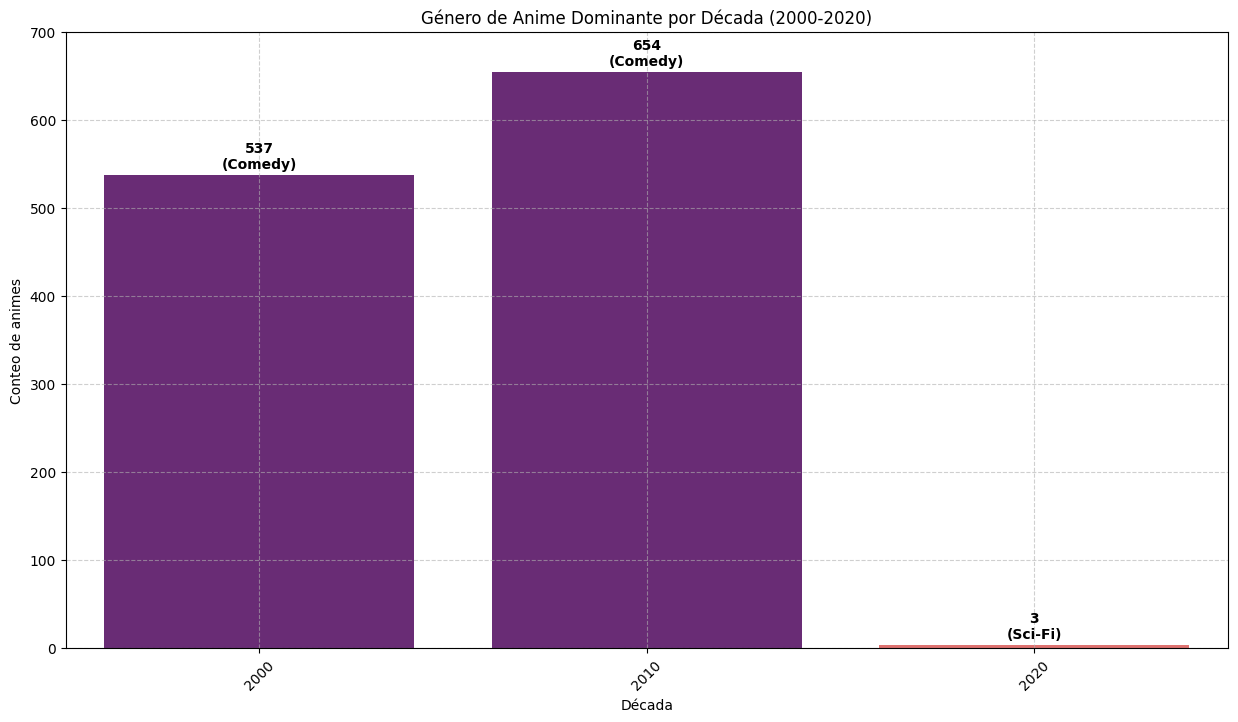

In [8]:
plt.figure(figsize=(15,8))
plt.ylim(0,700)
ax = sns.barplot(data=df_dominante, x='decada', y='conteo', palette='magma', hue='nombre_genero', legend=False)
plt.xticks(rotation=45)
plt.title('Género de Anime Dominante por Década (2000-2020)')
plt.xlabel('Década')
plt.ylabel('Conteo de animes')
plt.grid(True, linestyle='--', alpha=0.6)

for p in ax.patches:
    altura = p.get_height()
    
    if altura > 0:
        x_pos = p.get_x() + p.get_width() / 2
        
        genero_decada = df_dominante[df_dominante['conteo'] == altura]
        
        if not genero_decada.empty:
            genero_str = genero_decada['nombre_genero'].iloc[0]
            
            label_text = f'{int(altura)}\n({genero_str})'
            
            ax.text(
                x=x_pos,        
                y=altura + 5,   
                s=label_text,   
                ha='center',    
                va='bottom',    
                fontsize=10,
                fontweight='bold'
            )

plt.show()

**Respuesta:**

El genero de anime que es el más dominante en cada decada es el genero de `comedy`, en el caso de de la decada de `2020` la cantidad de animes que se muestra o en si el genero aparee no podría ser el dominante ya que no se extragieron muchos datos de la API, lo cual ya se había identificado como una recomendación de mejora.

* **¿Qué diferencia a un anime con rating sobresaliente de uno promedio?**

In [106]:
def categorizacion(score):
    if score >= 8.5:
        return 'Sobresaliente'
    elif score >= 6.0 and score < 8.5:
        return 'Promedio'
    else:
        return 'Bajo'

# Exlución de valors imputados
df_animes = dic_df['Animes']
df_popularidad = dic_df['Popularidad']
df_animes = df_animes[(df_animes['tipo'] != 'N/A') & (df_animes['episodios'] != 9999) & (df_animes['annio'] >= 2000)]
df_popularidad = df_popularidad[(df_popularidad['score'] != 9999) & (df_popularidad['scored_by'] != 9999)]

# Unir las tablas
merge_anime_popularidad = pd.merge(df_animes, df_popularidad, on='mal_id', how='inner')

merge_anime_popularidad['categoria'] = merge_anime_popularidad['score'].apply(categorizacion)

resumen_diferencia = merge_anime_popularidad.groupby('categoria').agg(
    Total_Animes=('mal_id', 'count'),
    Avg_Episodios=('episodios', 'mean'),
    Avg_Votos=('scored_by', 'mean'),
    Avg_Popularidad=('popularidad', 'mean')
).round(0).reset_index()

resumen_diferencia

,categoria,Total_Animes,Avg_Episodios,Avg_Votos,Avg_Popularidad
0,Bajo,335,27.0,11950.0,9869.0
1,Promedio,2089,26.0,109920.0,3939.0
2,Sobresaliente,44,32.0,704559.0,446.0


**Respuesta:**

* Los animes `Sobresalientes` tienen a tener un `score` superior o igual a `8.5` con un promedio de `32 episodios`, lo que significa que tienen a tener más de una temporada(pueden a llegar a incluir `OVAS` o `episodios extras`) con un promedio de `votos` de `700,000` lo que es seies veces más que un anime `Promedio`.
* Los anaimes `Sobresalientes` tiene una popularidad promedio de `446`, mientras que los animes `Promedio` tiene una popularidad de `3,939`, un `promedio de popularidad` baja(es decir, cerca de la posición #1) confirma que estos animes son de concimiento y seguimiento masivo.

La calidad no es solo una función de score, si no que los animes `Sobresalientes` son aquellos que logran ser éxitos de critica y, simultáneamente, se convirtieron en fenómenos culturales consumnidos por una audiencia gigantesca.

#### **3. Estudios de animación**

* **¿Qué estudios producen los animes mejor valorados?**

In [107]:
df_animes = dic_df['Animes']
df_popularidad = dic_df['Popularidad']

df_animes = df_animes[df_animes['annio'] >= 2000]
df_popularidad = df_popularidad[df_popularidad['score'] != 9999]

anime_popularidad = pd.merge(df_animes, df_popularidad, on='mal_id', how='inner')
anime_popularidad_anime_estudios = pd.merge(anime_popularidad, dic_df['Anime_Estudios'], on='mal_id', how='inner')
merge_estudios_animes_mejor_valorado = pd.merge(anime_popularidad_anime_estudios, dic_df['Estudio'], on='estudio_id', how='inner')

group_estudios = merge_estudios_animes_mejor_valorado.groupby('nombre_estudio')['score'].mean().round(2).reset_index()
group_estudios = group_estudios.sort_values(by='score', ascending=False)
group_estudios

,nombre_estudio,score
70,Egg Firm,8.41
137,Marvy Jack,8.30
199,Shuka,8.16
254,Tokyo Movie Shinsha,8.02
151,Nut,7.96
...,...,...
122,Kyotoma,4.58
226,Studio Kelmadick,4.49
236,Studio! Cucuri,4.14
38,Bouncy,3.90


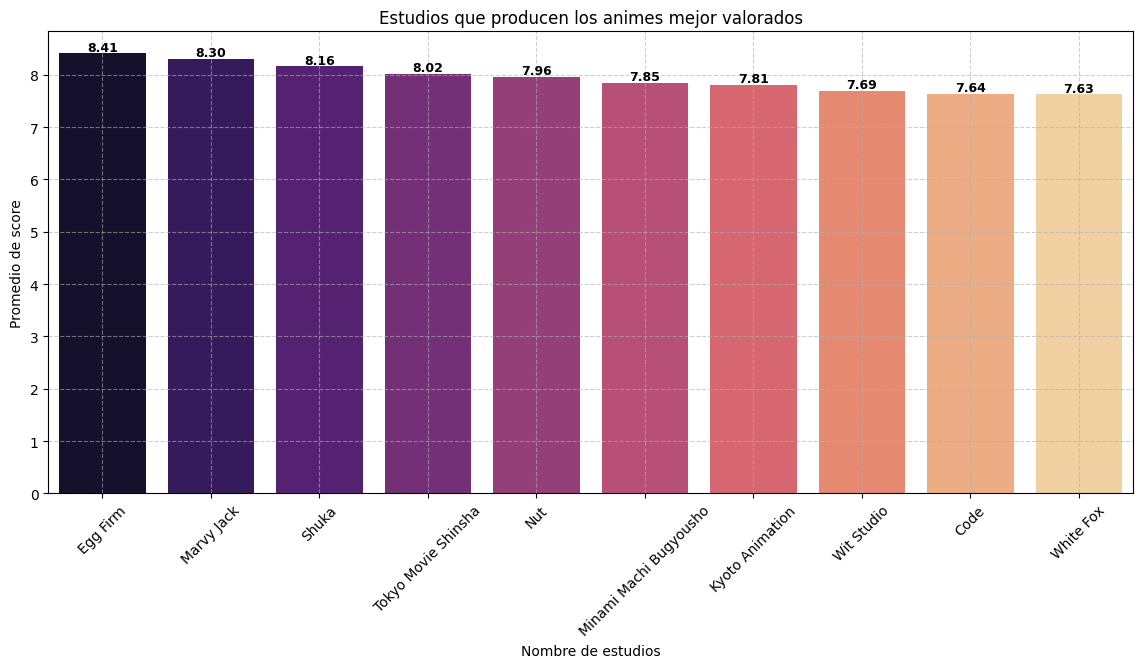

In [108]:
plt.figure(figsize=(14,6))
sns.barplot(data=group_estudios.head(10), x='nombre_estudio', y='score', palette='magma', hue='nombre_estudio')
plt.xticks(rotation=45)
plt.title('Estudios que producen los animes mejor valorados')
plt.xlabel('Nombre de estudios')
plt.ylabel('Promedio de score')
plt.grid(True, linestyle='--', alpha=0.6)

for index, row in group_estudios.head(10).iterrows():
    # Coordenadas X e Y donde se colocará el texto
    x_coord = row['nombre_estudio']
    y_coord = row['score']
    
    # El valor a mostrar, redondeado a 2 decimales
    valor_texto = f"{y_coord:.2f}"
    
    # Posicionar el texto
    plt.text(
        x=x_coord, 
        y=y_coord + 0.05, 
        s=valor_texto, 
        ha='center',       
        fontsize=9,
        weight='bold' 
    )

plt.show()

**Respuesta:**

1. Egg Firm:	            8.41
1. Marvy Jack:	            8.30
1. Shuka:	                8.16
1. Tokyo Movie Shinsha:	    8.02
1. Nut:	                    7.96
1. Minami Machi Bugyousho:  7.85
1. Kyoto Animation:         7.81
1. Wit Studio:              7.69
1. Code:                    7.64
1. Wite Fox:               7.63

Los 10 estudios muestran producir animes con un promedio de `score` superior a 7.

#### **4. Producción**

* **¿Cuántos episodios tiene cada anime y su duración?**

In [109]:
df_animes = dic_df['Animes']
df_animes = df_animes[(df_animes['annio'] >= 2000) & (df_animes['tipo'] == 'TV') & (df_animes['episodios'] != 9999)]
grupo_anime_duración = df_animes.groupby(['titulo','duracion'])['episodios'].sum().reset_index()
grupo_anime_duración

,titulo,duracion,episodios
0,.hack//Roots,24 min per ep,26
1,.hack//Sign,24 min per ep,26
2,.hack//Tasogare no Udewa Densetsu,23 min per ep,12
3,009-1,24 min per ep,12
4,07-Ghost,23 min per ep,25
...,...,...,...
2664,iDOLM@STER Xenoglossia,23 min per ep,26
2665,s.CRY.ed,24 min per ep,26
2666,xxxHOLiC,24 min per ep,24
2667,xxxHOLiC◆Kei,24 min per ep,13


**Respuesta:**

Se logra mostrar el titulo de anime con su duración y la cantodad de episodios que contienen.

* **¿Cuál es la duración por episodios más común en los animes?**

In [82]:
grupo_duración_cantidad = df_animes.groupby('duracion')['mal_id'].count().reset_index()
grupo_duración_cantidad.sort_values(by='mal_id', ascending=False).head(10)

,duracion,mal_id
18,24 min per ep,1050
17,23 min per ep,635
19,25 min per ep,214
23,3 min per ep,120
33,5 min per ep,100
16,22 min per ep,97
12,2 min per ep,73
27,4 min per ep,55
0,1 min per ep,47
3,12 min per ep,31


**Respuesta:**

La duración más común por episodio en los animes suele ser de 24 minutos.

* **¿Qué relación existe entre la duración del anime y su rating?**

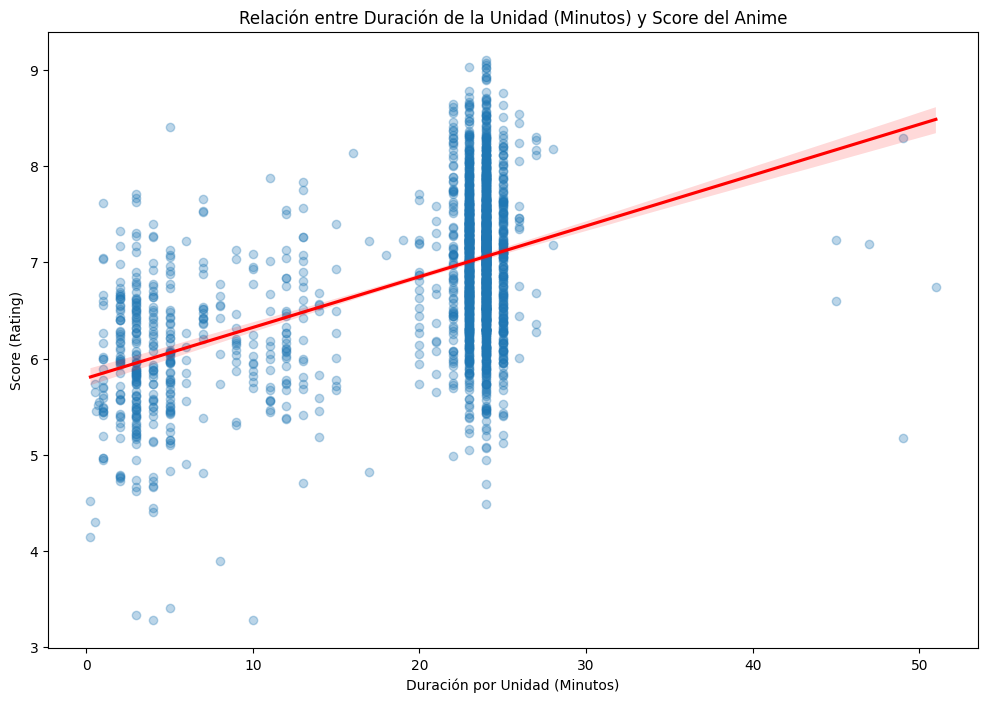

In [110]:
import numpy as np
import re

def limpiar_y_convertir_unidad_duracion(duracion_str):

    if pd.isna(duracion_str) or duracion_str in ['Unknown', 'N/A']:
        return np.nan

    # Normalizar: eliminar etiquetas de unidad y espacios
    duracion_str = duracion_str.lower().replace('.', '')
    # Remover ' per ep', ' per batch', ' per item', etc., para aislar la duración de la unidad
    duracion_str = re.sub(r' per\s+(ep|batch|item)', '', duracion_str)

    total_segundos = 0
    
    # Búsqueda de Horas, Minutos y Segundos
    
    # Horas
    horas_match = re.search(r'(\d+)\s*hr', duracion_str)
    if horas_match:
        total_segundos += int(horas_match.group(1)) * 3600

    # Minutos
    minutos_match = re.search(r'(\d+)\s*min', duracion_str)
    if minutos_match:
        total_segundos += int(minutos_match.group(1)) * 60

    # Segundos
    segundos_match = re.search(r'(\d+)\s*sec', duracion_str)
    if segundos_match:
        total_segundos += int(segundos_match.group(1))

    if total_segundos == 0:
        return np.nan

    # Devolver la duración de la UNIDAD en minutos
    return total_segundos / 60


df_animes = dic_df['Animes']
df_popularidad = dic_df['Popularidad']
df_animes = df_animes[(df_animes['annio'] >= 2000) & (df_animes['tipo'] == 'TV')]
df_popularidad = df_popularidad[df_popularidad['score'] != 9999]

merge_anime_popularidad = pd.merge(df_animes, df_popularidad, on='mal_id', how='inner')

merge_anime_popularidad['duracion_min_unidad'] = merge_anime_popularidad['duracion'].apply(
    limpiar_y_convertir_unidad_duracion
)

df_analisis_final = merge_anime_popularidad.dropna(subset=['duracion_min_unidad'])

plt.figure(figsize=(12,8))
sns.regplot(
    data=df_analisis_final, 
    x='duracion_min_unidad', 
    y='score', 
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.title('Relación entre Duración de la Unidad (Minutos) y Score del Anime')
plt.xlabel('Duración por Unidad (Minutos)') # Ahora este eje no pasará de 200 minutos
plt.ylabel('Score (Rating)')
plt.show()

**Respuesta:**

* La mayor concentración de puntos se encuentra alrededor de los 24 minutos en el eje X, este clúster representa las series de televisión estándar.
* La línea de regresión (roja) sigue mostrando una correlación débilmente positiva, a medida que la duración de la unidad se acerca a los 50-60 minutos y más (el rango de películas/OVAs), la línea de tendencia sube ligeramente, indicando que las unidades de contenido más largas (películas) tienden a tener scores promedio marginalmente más altos que las series cortas.

Existe una correlación positiva muy débil. La duración de la unidad (episodio vs. película) no es el factor determinante del score de un anime.
> El factor más significativo no es la duración en sí misma, sino el tipo de producción que suele tener esa duración. Las películas y los OVA más largos (unidades entre 60 y 120 minutos) se asocian marginalmente con scores más altos que los episodios de TV, probablemente debido a un mayor presupuesto y valor de producción por unidad de tiempo.

#### **5. Estacionalidad**

* **¿Qué temporada (invierno, primavera, verano, otoño) concentra más títulos?**

In [84]:
df_animes = dic_df['Animes']
df_animes = df_animes[(df_animes['annio'] >= 2000) & (df_animes['temporada'] != 'N/A')]

group_temporada_titulos_estrenados = df_animes.groupby('temporada')['mal_id'].sum().reset_index(name='cantidad_animes_estrenados')
group_temporada_titulos_estrenados = group_temporada_titulos_estrenados.sort_values(by='cantidad_animes_estrenados', ascending=False)
group_temporada_titulos_estrenados

,temporada,cantidad_animes_estrenados
1,spring,11902056
0,fall,9975750
3,winter,8232366
2,summer,7702626


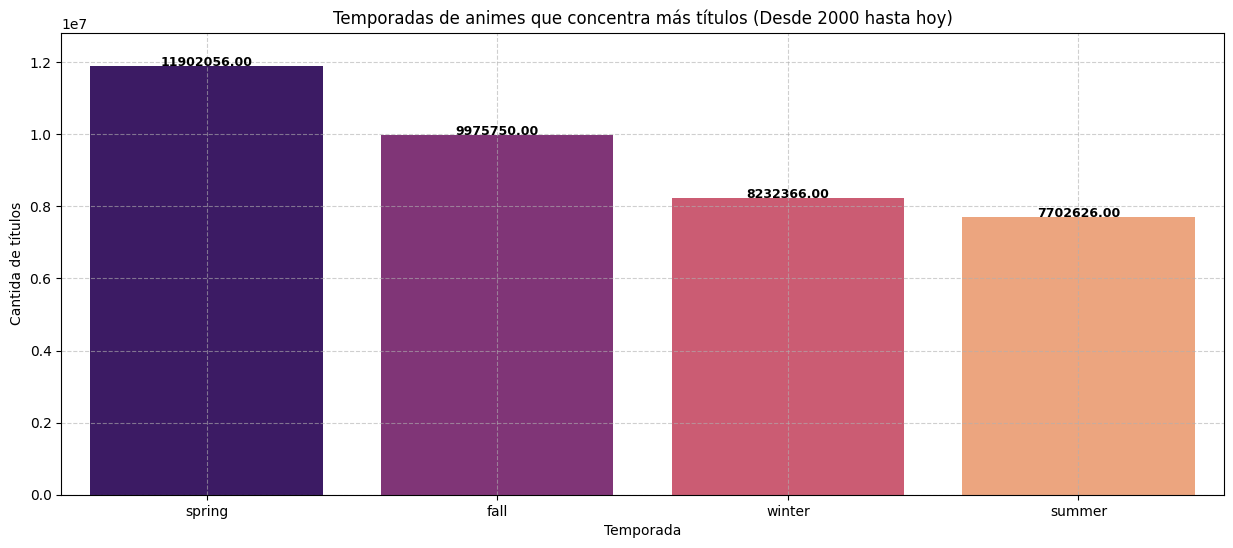

In [85]:
plt.figure(figsize=(15,6))
sns.barplot(data=group_temporada_titulos_estrenados, x='temporada', y='cantidad_animes_estrenados', palette='magma', hue='temporada')
plt.title('Temporadas de animes que concentra más títulos (Desde 2000 hasta hoy)')
plt.xlabel('Temporada')
plt.ylabel('Cantida de títulos')
plt.ylim(0,12816399)
plt.grid(True, linestyle='--', alpha=0.6)

for index, row in group_temporada_titulos_estrenados.iterrows():
    x_coord = row['temporada']
    y_coord = row['cantidad_animes_estrenados']
    
    # El valor a mostrar, redondeado a 2 decimales
    valor_texto = f"{y_coord:.2f}"
    
    # Posicionar el texto
    plt.text(
        x=x_coord, 
        y=y_coord + 0.09, 
        s=valor_texto, 
        ha='center',       
        fontsize=9,
        weight='bold' 
    )

plt.show()

**Respuesta:**

La temporada con más animes estrenados desde el 2000 hasta hoy es la tempora de `spring(primavera)` con una cantidad `11,902,056`, esto nos dice que la mayoria de los estudios obtan por estrenas los animes en dicha temporada.

* **¿Hay patrones en los ratings según temporada de estreno?**

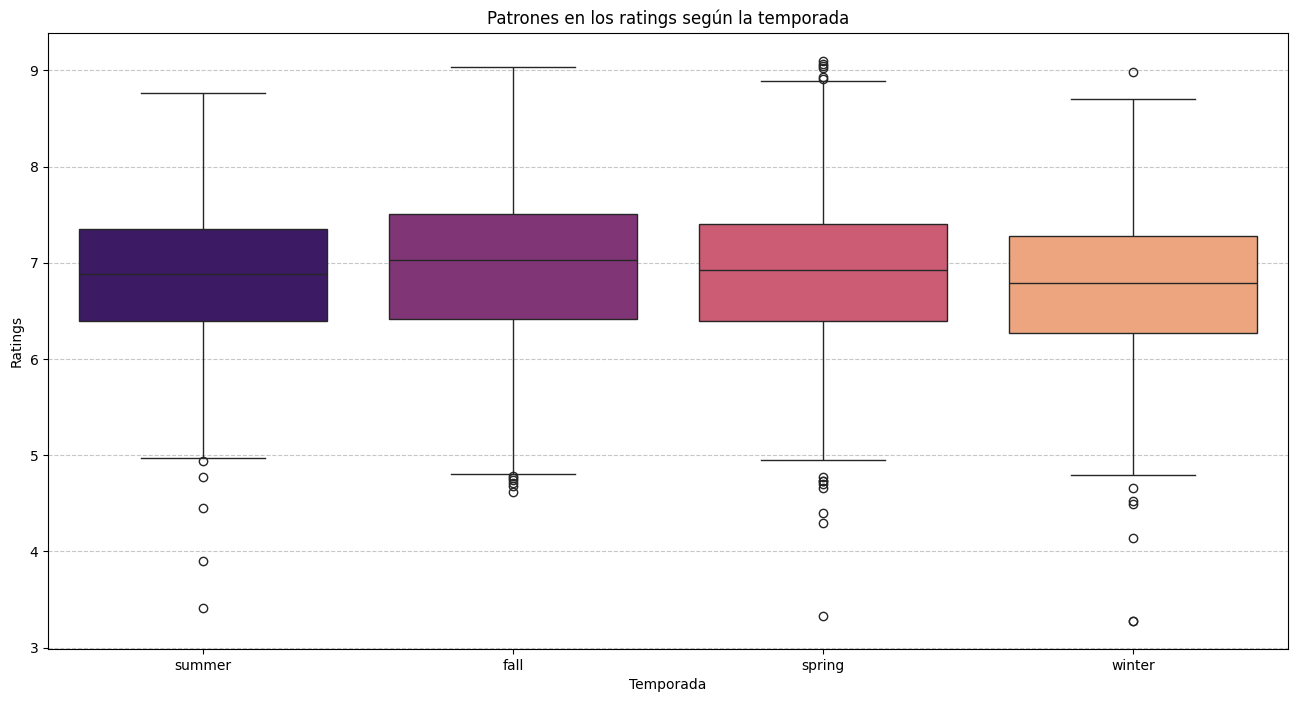

In [111]:
df_animes = dic_df['Animes']
df_popularidad = dic_df['Popularidad']

df_animes = df_animes[(df_animes['annio'] >= 2000) & (df_animes['temporada'] != 'N/A')]
df_popularidad = df_popularidad[df_popularidad['score'] != 9999]

merge_anime_popilaridad = pd.merge(df_animes, df_popularidad, on='mal_id', how='inner')

plt.figure(figsize=(16, 8))
sns.boxplot(data=merge_anime_popilaridad, x='temporada', y='score', palette='magma', hue='temporada')
plt.title('Patrones en los ratings según la temporada')
plt.xlabel('Temporada')
plt.ylabel('Ratings')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**Respuesta:**

No existe un patrón fuerte donde una temporada sea consistentemente mucho mejor o peor que las demás. La calidad media (mediana) y el potencial de éxito o fracaso extremo (outliers) son similares en todas las temporadas.

> La decisión de un estudio de lanzar un anime en una temporada específica no parece tener un impacto significativo en la calificación que recibirá de la audiencia (siempre y cuando sea un anime de calidad promedio). La calidad es más dependiente de factores como el estudio, el director y el género.